# Adatbányászat gyakorlat 2.
***
Időpont: péntek, 8\:30–10\:00 és 10\:15–11\:45<br/>
Helyszín: UNIX-labor, 3-107<br/>
Elérhetőségek: TEAMS chat, csoport

 ***
Órai munka: https://drive.google.com/drive/folders/1wztr4g186c5l8U3aY4JS_BNO3fSdWd15?usp=sharing



## Követelmények
***

### Röpzh
Minden óra végén fel lesz adva néhány egyszerű, lényegretörő kérdés az adott óra anyagából.

#### Értékelés
Minden feladat **1 pontot** ér a végső elszámolásban. Röpzh-kból összesen **10 pont** szerezhető majd.

### Házi feladat
A házi feladatok elkészítésére mindig **3 hetetek** lesz, beküldés után pedig még van lehetőség javítani a visszaküldött feladatokon. Az első változatot azonban a feladástól számított **két héten belül** várjuk, javítani csak ekkor lehet a visszaküldött feladatokon. <br/>
A notebookoknak hozzatok létre egy saját Google Drive mappát, és állítsátok be, hogy ezt a megosztó link birtokában bárki megtekinthesse. A notebookhoz tartozó linket és a html fájlt az óra Teams csoportjába kell majd feltölteni.

#### Értékelés
Az összesen 6 db házi feladatból **4 db hibátlan visszaküldése feltétele az elégséges jegynek**. Minden további visszaküldött házi feladat feladatonként **1-1 pontot** ad a végső elszámoláshoz.

### Projektmunka
A félév második felében két-háromfős csoportokban adatbányászati feladatokat fogtok megoldani. Erről a félév végén le kell adni egy legalább ötoldalas **dokumentációt**, valamint az utolsó héten **prezentálnotok** kell 7-10 percben az eredményeket. A 8. héten lesz egy bevezető pár perces előadásotok, ahol a bemutatjátok az adathalmazt, megfogalmazzátok a hipotéziseitek.

#### Értékelés
A projektmunkát az elvégzett munka, a leadott dokumentáció és a prezentáció minősége alapján értékelni fogjuk. A szerezhető összpontszám **30 pont**. A pozitív eredmény (hipotézis beigazolása, jó teljesítmény elérése) **nem** feltétele a jó jegynek. Az egész csapat ugyanazt az értékelést kapja, kivéve, ha ezt külön kéritek.

### Összpontszám:
Összesen tehát **40 pont** szerezhető. A jegyek a következőképp alakulnak majd:
- Ha legalább 4 házi feladat el lett fogadva, akkor:
  - 20 pont alatt: elégtelen
  - 20-24 pont: elégséges
  - 25-29 pont: közepes
  - 30-34 pont: jó
  - 35 pont felett: kiváló
- Ha 4-nél kevesebb házi feladatot küldtetek be, akkor a végső jegy elégtelen.

In [ ]:
def whats_my_final_grade(projekt_pontszam, ropz_pontszam, elvegzett_hazifeladatok):
  if elvegzett_hazifeladatok < 4:
    return 1
  else:
    pontszam = projekt_pontszam + ropzh + (elvegzett_hazifeladatok - 4)
    jegy = (pontszam - 15) // 5 + 1
    jegy = max([ min(jegy,5), 1 ])
    return jegy

projektmunka = 30 # (pont)
ropzh = 10 # (pont)
hazifeladatok = 6 # (db)

print("Végső jegy: ", whats_my_final_grade(projektmunka, ropzh, hazifeladatok))

# Kapcsolódás a Kaggle-höz

A [Kaggle](https://www.kaggle.com/) egy data science platform, ahol különféle versenyeken lehet résztvenni. Mi adatletöltésre fogjuk egyelőre csak használni.

1. Regisztrálj a kaggle.com oldalra
2. Menj a kaggle.com oldalon az Account részhez, és töltsd le az API-tokened.
3. Töltsd fel a tokent (kaggle.json) a fájlok közé Colabben az alábbi tool segítségével.
4. Töltsd le az [adathalmazt](https://www.kaggle.com/datasets/yasserh/titanic-dataset) és bontsd ki a tömörített zip fájlt.
5. Ha minden jól ment, megtalálod a `Titanic-Dataset.csv` fájlt a Fájlok között.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!kaggle datasets download -d yasserh/titanic-dataset
!unzip titanic-dataset.zip

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 2.91MB/s]
Archive:  titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


# 2. gyakorlat: Pandas és előzetes adatelemzés

Ezen a gyakorlaton a [pandas](https://pandas.pydata.org/docs/reference/index.html) könytárral ismerkedünk. Ez a legelterjedtebb csomag, amivel pythonban a tabuláris (táblázatos) adatokat kezeljük. Most a legalapvetőbb funckióit nézzük meg.

Két fő típus van:
*   `pd.Series`: a táblázat egy oszlopa (vagy bármely egy dimenziós pandas array)
*   `pd.DataFrame`: táblázat maga (többdimenziós adathalmaz, oszlopnevekkel)

***

Amikor elkezdünk egy adathalmazzal foglalkozni előzetesen mindig legalább a következő kérdésekre kell választ találjunk:

- Alapadatok:
  - mintaméret: sorok száma
  - feature-ök száma: oszlopok száma
  - feature-ök jelentése
- Adattartalom:
  - feature-ök adattípusai
  - vannak-e hiányzó mezők
  - milyen az adatok eloszlása: szélső- és középértékek, kiugró értékek, megoszlás
- Változók közti kapcsolat feltérképezése
  - korreláció vizsgálat
  - kontingencia táblák
  - grafikonok
- Hipotézisek megfogalmazása és tesztelése

In [ ]:
import pandas as pd
pd.__version__

'1.4.4'

# Adatbeolvasás

[XKCD, 1598: Salvage](https://xkcd.com/1598/)

A híres [Titanic](https://www.kaggle.com/datasets/yasserh/titanic-dataset
) adathalmazzal fogunk foglalkozni.

> *Az RMS Titanic brit Olympic osztályú utasszállító hajó korának egyik legnagyobb utasszállító óceánjárója volt. Elsüllyeszthetetlennek tartott rekeszes hajótörzzsel rendelkezett, ennek ellenére mégis már a legelső útján elsüllyedt, miután jéghegynek ütközött 1912. április 14-én.* ([wiki](https://hu.wikipedia.org/wiki/RMS_Titanic))


In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")
display(df)

FileNotFoundError: ignored

In [ ]:
print(f"Dataset contains {len(df)} rows and {len(df.columns)} columns (features).")

## Indexelés, szűrés

In [ ]:
df.loc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [ ]:
df.at[0,"Pclass"]

3

In [ ]:
df["Embarked"] == "S" #Ezzel azt kérdezzük le, hogy kik azok, akik Southamptonban szálltak fel

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [ ]:
df[df["Embarked"] == "S"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
df.query("Embarked == 'S'")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


# Adatelemzés

[XKCD, 688: Self-Description](https://xkcd.com/688/)

Kétféle típust különböztetünk meg:

- numerikus: `int` vagy `float` (diszkrét vagy folytonos)
- kategorikus: `int` vagy `object` (néha `category`)

Figyelem! Nem mindig igaz a fenti ökölszabály. Érdemes végiggondolni minden adathalmazon, hogy milyen változóról beszélünk. A `Pclass` oszlop itt például `int`-eket tartalmaz, de valójában kategorikus változó, lehetséges értékeit a `{"first","second","third"}` stringeket tartalmazó halmazból is felvehetné.

A Kaggle oldalról lelessük az oszlopok jelentését:

- PassengerId: az utasok egyedi azonosítója
- Survived: túlélte-e az utas a katasztrófát
- Pclass: milyen osztályon utazik
- Name: teljes név, Vezetéknév, Keresztnév formában
- Sex: az utas neme
- Age: az utas kora
- SibSp: utazik-e testvér / jegyes a hajón (Siblings & Spouses)
- Parch: utazik-e szülő / gyerek a hajón (Parent & Children)
- Ticket: a jegy sorszáma
- Fare: a jegy ára
- Cabin: kabin száma
- Embarked: beszállás helye
  - C: Cherbourg
  - Q: Queenstown
  - S: Southampton

In [ ]:
df.dtypes # az Age float!

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.isna().sum() # az Age, Cabin és Embarked oszlopok hiányosak

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.rename(columns={"Parch": "ParCh"}) #nevezzük át az oszlopot a konvenció betartásával
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'ParCh', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Az ID egyedisége

In [ ]:
df["PassengerId"].nunique(), len(df) # valóban egyedi a PassengerId

(891, 891)

## Kategorikus változók

In [ ]:
# listázzuk ki a kategorikus változók egyedi értékeit
for (column,dtype) in df.dtypes.items():
  if dtype == "object":
    print(column,df[column].nunique(),sep='\t')

Name	891
Sex	2
Ticket	681
Cabin	147
Embarked	3


In [ ]:
# a kevés elemű kategorikus változók lehetséges értékeit írassuk is ki, majd nézzük meg az eloszlásukat!
possible_values = {}
for column in ["Sex","Embarked"]:
  possible_values[column] = df[column].unique()
possible_values

{'Sex': array(['male', 'female'], dtype=object),
 'Embarked': array(['S', 'C', 'Q', nan], dtype=object)}

In [ ]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df["Embarked"].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

<AxesSubplot:>

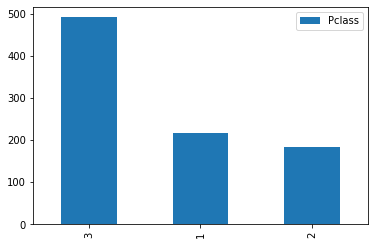

In [ ]:
df["Pclass"].value_counts().plot.bar(legend=True) # ábrázolhatjuk is

In [ ]:
pd.crosstab(df["Sex"],df["Pclass"]) # diszrkét eloszlású változók esetén kontigencia tábla is létrehozható

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [ ]:
pd.crosstab(df["Sex"],df["Pclass"], values=df["Fare"], aggfunc="mean") # vagy egy harmadik változó feltétles (aggregált) eloszlását is nézhetjük

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


In [ ]:
pd.crosstab(df["Sex"], df["Pclass"])

NameError: ignored

<AxesSubplot:xlabel='Sex'>

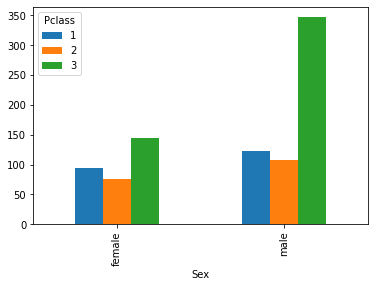

In [ ]:
df.groupby("Sex")["Pclass"].value_counts().unstack().plot.bar(legend=True) # a vizsgált statisztikát ábrázolhatjuk is

## Numerikus változók

In [ ]:
df["Age"].min(), df["Age"].max() # nem integer, mint előre várnánk!

(0.42, 80.0)

In [ ]:
df["Age"].agg(["min","max","mean","std"]) # sok statisztika esetén érdemes aggregálni és a megfelelő string függvény neveket ismerni

min      0.420000
max     80.000000
mean    29.699118
std     14.526497
Name: Age, dtype: float64

<AxesSubplot:>

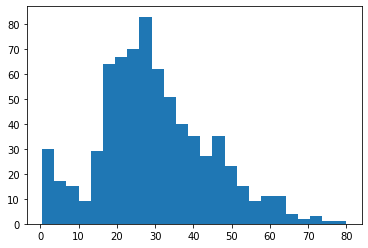

In [ ]:
df["Age"].hist(grid=False, bins=25) # ha a teljes eloszlást néznénk

In [ ]:
df.groupby("Sex")["Age"].agg(["min","max"]) # lehet nézni a statisztikákat egy másik változó értékei szerint is

,min,max
Sex,,
female,0.75,63.0
male,0.42,80.0


Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

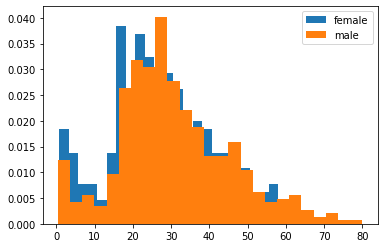

In [ ]:
df.groupby("Sex")["Age"].hist(alpha=1, density=True, legend=True, grid=False, bins=25) # és a feltételes eloszlást is

# Hipotézis tesztelés

[XKCD, 2726: Methodology trial](https://xkcd.com/2726/)

**Hogyan éljük túl a katasztrófát?**

Számos mondás terjed katasztrófákról. Az első gyakori szólam, hogy először a **nőket és a gyerekeket** mentették ki. Él azonban az a nézet is, hogy az **elsőosztályú** vendégek előnyt élveztek a mentés során.

Fogalmazzunk meg és teszteljünk néhány hipotézist a túlélésre vonatkozóan!

1. Hipotézis: A nők előnyt élveztek a kimentés során, de azon belül is az első osztályon utazó hölgyek.
2. Hipotézis: A túléléssel leginkább korreláló numerikus változó a kor lesz.

Próbáljuk megválaszolni a kérdést!

1. A nők

In [ ]:
df["Survived"].value_counts(normalize=True) # az utasok mindösszesen 38%-a élte túl a katasztrófát

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
pd.crosstab(df["Sex"],df["Pclass"],df["Survived"],aggfunc="mean")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Tehát osztálytól függetlenül a nőket részesítették előnyben a mentés során, sőt míg az első osztályon utazó nők 97%-a megmenekült, a harmadosztályon utazóknak csak a fele.

2. A korreláció

In [ ]:
df.corr()["Survived"] # default értékben a Pearson féle korrelációt nézi

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
ParCh          0.081629
Fare           0.257307
Name: Survived, dtype: float64

<AxesSubplot:>

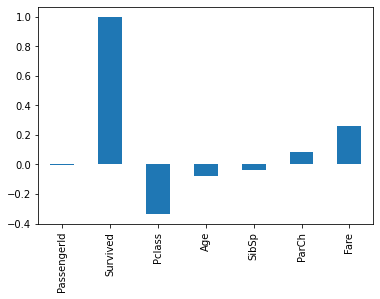

In [ ]:
df.corr()["Survived"].plot(kind="bar") # ábrázolhatjuk is

A `Survived` oszloppal leginkább korreláló numerikus feature-ök a `Pclass` (-0.34) és a `Fare` (0.26). Tehát minél magasabb osztályon utazott valaki, annál nagyobb a megmenekülésének valószínűsége (a nemtől függetlenül, lásd 1. hipotézis).

Másrészt, nem várható, hogy mentéskor a jegy árát kérdezgették az emberektől. Ez a klasszikus rejtett vagy harmadik változó esete: a cél változó és a vizsgált változó között van egy harmadik (rejtett változó), amelyik a korrelációt okozza. Jelen esetben ezt tudhatjuk is, a jegyár nyilvánvalóan az utas osztály függvénye:

In [ ]:
df["Fare"].corr(df["Pclass"]).min() # lehet nézni csak néhány oszlopra

-0.5494996199439074

***

# Fájl mentése a Drive-ra

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv("drive/MyDrive/titanic.csv") #, index = False)
# vagy drive/MyDrive/AHOL_DOLGOZOL/titanic.csv

In [ ]:
pd.read_csv("drive/MyDrive/titanic.csv") # Unnamed: 0 oszlop eltűntetése

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Gyakorlás

A feladatok során próbálj minél több órán látott módszert használni!  Ha teheted, nézd meg, milyen beállításokkal tudod még jobban kihasználni az API adta lehetőségeket.

1. Vizsgáld meg egy (órán eddig nem vizsgált) kategorikus és egy folytonos változó eloszlását és ábrázold is egy megfelelő diagramon!
2. Hogyan hat a túlélés valószínűségére, ha egy családtagod utazott veled együtt (`SibSp` és `ParCh` oszlopok)? Fogalmazz meg előre egy hipotézist, aztán teszteld le! A kapott eredményhez készíts megfelelő vizualizációt és statisztikákat. Mennyire tartod meglepőnek az eredményt? Mit gondolsz, ha 2 helyett 4 oszlopunk lenne, külön a testvéreknek, házastársnak, szülőnek és gyereknek, hasonló eredményre jutnánk?
3. A `.query()` paranccsal a *sorokra* lehet szűrni. Jellemezd néhány grafikonon a harmadosztályú utasokat! A `query` függvény működésének részleteiért hívd elő a *help*-et vagy nézd meg az API-ban a működését!
4. Válassz egy oszlopot, pl. `Age` és vedd a `df["Age"]` `pd.Series`-t. Milyen műveleteket tudsz rajta elvégezni, amiket már egy `np.array`-en megszoktál? Be tudsz szorozni, venni az átlagát, stb? Találsz olyan műveletet, amit csak ezen lehet? Hát olyat, amit csak egy `np.array`-jel tudtál megcsinálni? Mi van, ha két oszlopot veszel, pl `df[["Age","Pclass"]]`? Mennyire viselkedik egy többdimenziós `np.array`-hez hasonlóan?

## További feladatok otthoni gyakorlásra

5. Az alábbi művelet kilistázza azon utasokat, akiknek nem került semmibe a jegye:
```
df.query("Fare == 0")
```
Vizsgáld meg, hogy található-e ennek valami értelmes magyarázata, vagy ezeket hibás (kiugró) értékeknek kell kezeljük (pl. gyerek és ezért utazik ingyen, vagy valami családtaggal, stb.)?


In [ ]:
#2

df[["SibSp", "ParCh","Survived"]].corr()["Survived"] #Ez csinál egy dataframe-et, és ennek lekérem az utolsó oszlopát a végén lévő szögletes zárójellel

SibSp      -0.035322
ParCh       0.081629
Survived    1.000000
Name: Survived, dtype: float64

In [ ]:
d3 = df[df["Pclass"] == 3]

In [ ]:
d3.query("Embarked == 'S'") #Megnézzük, hogy mely harmadosztályú utasok szálltak fel Southamptonban

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


<AxesSubplot:>

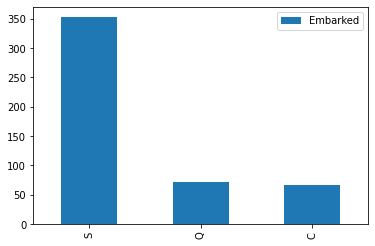

In [ ]:
d3["Embarked"].value_counts().plot.bar(legend=True)

In [ ]:
d3["Embarked"].value_counts() #Számszerűen is kikérjük, hogy kik hol szálltak fel a harmadosztályról

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [ ]:
d3["Sex"].value_counts() #Hány férfi és hány nő utazott a harmadosztályon

male      347
female    144
Name: Sex, dtype: int64

In [ ]:
d3["Sex"].value_counts(normalize=True) #Nemek százalékos eloszlása (kerekítve 71% férfi és 29% nő)

male      0.706721
female    0.293279
Name: Sex, dtype: float64

Sex     Embarked
female  S            88
        Q            33
        C            23
male    S           265
        C            43
        Q            39
Name: Embarked, dtype: int64

In [ ]:
df.query("Fare == 0")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [ ]:
df.corr()["Fare"]

PassengerId    0.012658
Survived       0.257307
Pclass        -0.549500
Age            0.096067
SibSp          0.159651
ParCh          0.216225
Fare           1.000000
Name: Fare, dtype: float64

<AxesSubplot:>

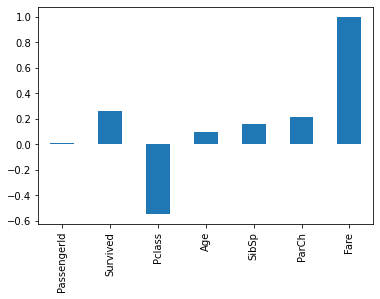

In [ ]:
df.corr()["Fare"].plot(kind="bar")

Age
0.42     AxesSubplot(0.125,0.125;0.775x0.755)
0.67     AxesSubplot(0.125,0.125;0.775x0.755)
0.75     AxesSubplot(0.125,0.125;0.775x0.755)
0.83     AxesSubplot(0.125,0.125;0.775x0.755)
0.92     AxesSubplot(0.125,0.125;0.775x0.755)
                         ...                 
70.00    AxesSubplot(0.125,0.125;0.775x0.755)
70.50    AxesSubplot(0.125,0.125;0.775x0.755)
71.00    AxesSubplot(0.125,0.125;0.775x0.755)
74.00    AxesSubplot(0.125,0.125;0.775x0.755)
80.00    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, Length: 88, dtype: object

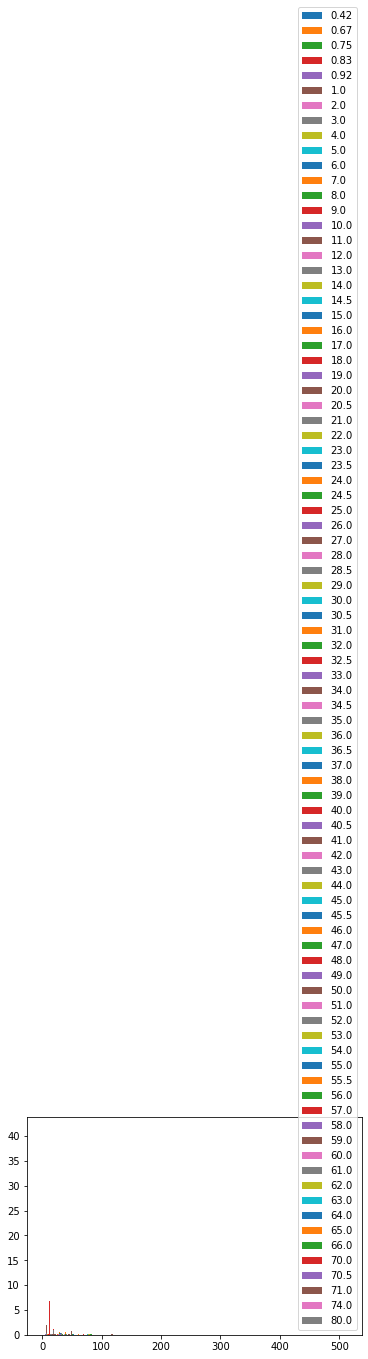

In [ ]:
df.groupby("Age")["Fare"].hist(alpha=1, density=True, legend=True, grid=False, bins=25)

# Érdekesség: Szófelhő a vezetéknevekből

Az alábbi kis szösszenet inkább érdekes mint hasznos, de ha nyelvi adatokkal foglalkozol, gyakran találkozhatsz vele.

https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud
  from wordcloud import WordCloud

In [ ]:
print(df["Name"].loc[0].split(','))

In [ ]:
names = df["Name"].apply(lambda name: name.split(',')[0])
display(names)

In [ ]:
names = ', '.join( names )
display(names)

In [ ]:
wc = WordCloud(
    background_color="white",
    height=400,
    width=600)

wc.generate( names )

plt.imshow(wc)
plt.axis("off")
plt.show()

# Házi feladat

Beküldési határidő:

- Első változat: március 23. 23:59:59
- Utolsó változat: március 30. 23:59:59

Beküldési útmutató:

- Mikor végeztél, mindig futtasd le az újra a kódod, hogy biztos nem maradt-e benne hiba (olyan kódot, ami nem fut le, sajnos nem tudunk elfogadni). Ezt a következőképp [teheted meg](https://python.plainenglish.io/how-to-convert-google-colab-notebook-ipynb-to-html-ccfeda199246):
1. Runtime / Restart and run all: újraindítja a sessiont, ha nincs bug a kódban, rendben lefut a végéig.
2. A kimenetekkel együtt töltsd le a notebookot `.ipynb` formátumban a gépedre.
3. A Files / Upload notebook menüből töltsd vissza a notebookod.
4. Futtasd a következő parancsot egy aktív notebookban:

```
  %%shell
  jupyter nbconvert --to html [NOTEBOOK_NAME].ipynb
```
5. A keletkezett html fájlt töltsd le, és a notebookra mutató Drive linkkel együtt töltsd fel a Teams csoportba, a megfelelő feladathoz. A megosztásnál figyelj, hogy a link birtokában bárki megtekinthesse a notebookot (szerkesztési jogot nem kell adnod).

## Feladatok

1. Fogalmazz meg egy hipotézist néhány, órán nem taglalt összefüggést egy célváltozó és legalább két másik oszlop között (mint az 1. hipotézisben a `Survived` és `Sex`,`Pclass` oszlopok között)! Tárd fel a köztük lévő összefüggéseket, és vonj le egy következtetést az előzetes hipotézisedre vonatkozóan (mint a 2. hipotézisben).  
Az elemzés során használj minél több órán látott módszert: bar és pie plot, kontingencia és kimutatás tábla, korreláció vizsgálat, eloszlás vizsgálat, stb!











In [ ]:
# te kódod

# HTML konvertálás

In [ ]:
alma # hibára fut, így nem fut le a következő cella a Run all alatt

In [ ]:
  %%shell
  jupyter nbconvert --to html adatbanyaszat_2023_tavasz_gyak1.ipynb